# Aufgabe 1: Farben und Histogramme

## Import

In [1]:
import keras
from keras.preprocessing.image import load_img, img_to_array
from IPython.core.display import display
from matplotlib import pyplot as plt
import numpy as np
from itertools import groupby
from PIL import Image

## Konstanten

In [2]:
FILE_1_PATH = '/home/fjogeo/Desktop/Python/DS bootcamp/UNI/data/a.bmp.txt'
FILE_2_PATH = '/home/fjogeo/Desktop/Python/DS bootcamp/UNI/data/22678930_15_09.bmp.txt'
KATZE = '/home/fjogeo/Desktop/Python/DS bootcamp/UNI/data/image3.jpg'

### Bild anzeigen und Dimensionen

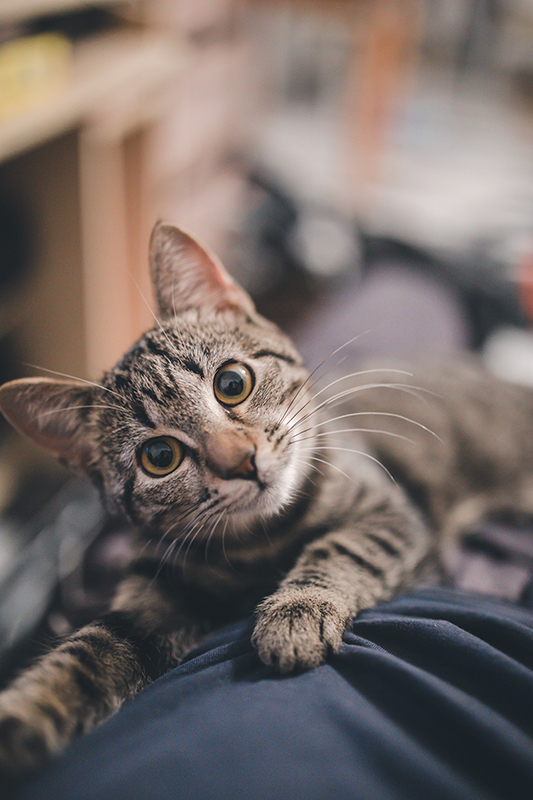

Shape: (800, 533, 3) 
Size: 1279200 
Min: 0.0 
Max: 255.0


In [3]:
bild = load_img(KATZE)
display(bild)

bild_array = img_to_array(bild)
print(f"Shape: {bild_array.shape} \nSize: {bild_array.size} \nMin: {bild_array.min()} \nMax: {bild_array.max()}")

### Histogramm

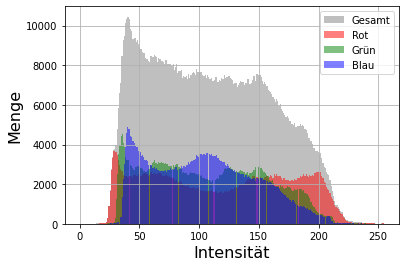

In [4]:
histogramm = plt.hist(bild_array.ravel(), bins = 256, color = 'gray', alpha = 0.5 )
histogramm = plt.hist(bild_array[:,:,0].ravel(), bins = 256, color = 'red', alpha = 0.5)
histogramm = plt.hist(bild_array[:,:,1].ravel(), bins = 256, color = 'green', alpha = 0.5)
histogramm = plt.hist(bild_array[:,:,2].ravel(), bins = 256, color = 'blue', alpha = 0.5)
histogramm = plt.legend(['Gesamt', 'Rot', 'Grün', 'Blau'])
histogramm = plt.xlabel('Intensität', fontsize=16)
histogramm = plt.ylabel('Menge', fontsize=16)

plt.rc('grid', linestyle="-", color='#cccccc', alpha=0.3)
plt.grid(True)

plt.show()

### Grüner Farbkanal

Text(0.5, 1.0, 'Grüner Kanal in grau')

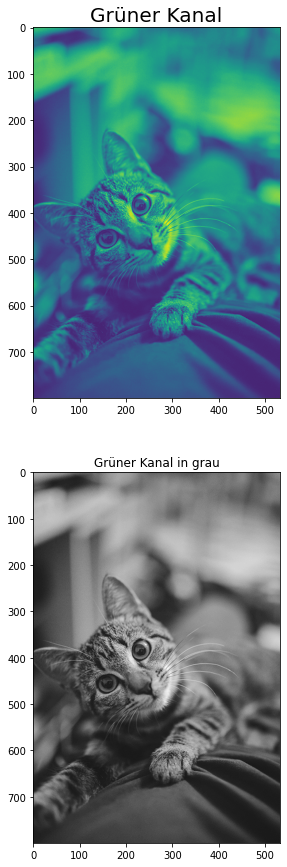

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
(ax_g, ax_g_in_grau) = axes

gruen = bild_array[:,:,1]

ax_g.imshow(gruen)
ax_g.set_title('Grüner Kanal', fontsize=20)

ax_g_in_grau.imshow(gruen, cmap='gray')
ax_g_in_grau.set_title('Grüner Kanal in grau')


# Aufgabe3: Run Length "Decoder"

In [6]:
# rle
from itertools import groupby

def rlencoder(path):
    # Splitten des Pfades um den Dateinamen wiederverwenden zu können
    _, filename = path.split("/")

    # Laden der Bilddatei
    img = img_to_array(load_img(path))

    # Extrahieren eines Kanals der Bilddatei (wir möchten für das RLE lediglich
    # einen Kanal nutzen)
    img = img[:, :, 0]

    # Aufteilen in Zeilen und Spalten damit wir über Zeilen iterieren können
    x, y = img.shape

    # Iterieren über Zeilen...
    for rows in range(x):
        row = img[rows]

        # ... um im ersten Schritt die Werte kleiner als 128 in ein "B"(lack) 
        # zu konviertieren, alle anderen Werte in "W"hite
        row = np.where(row <= 128, "B", "W")

        # Hier rettet uns Itertools, indem es uns erlaubt für das weitere
        # Encoding auf die `groupy` Methode zuzugreifen: 
        # https://docs.python.org/3/library/itertools.html#itertools.groupby

        # Groupy ermöglicht das automatische zählen der "B"s und "W"s in
        # unserem Array! (weiterführend: https://www.youtube.com/watch?v=Qu3dThVy6KQ)
        encoding = [(key, sum(1 for _ in group)) for key, group in groupby(row)]

        # Wir "joinen" unsere Listeninhalte: ("B", 310) -> 310B
        encoding = "".join("{}{}".format(count, key) for key, count in encoding)

        # Wir hätten der Einfachheit halber gerne eine neue Zeile
        # für jede encodete Zeile
        encoding = encoding + "\n"

        # Wir erzeugen eine Datei, schreiben unser encoding in 
        # die Datei und schließen diese
        text_file = open(f"{filename}.txt", "a")
        text_file.write(encoding)
        text_file.close()

In [7]:
#Test
img = load_img('/home/fjogeo/Desktop/Python/DS bootcamp/UNI/data/a.bmp')
display(img)

img_array = img_to_array(img)
print(f"Shape: {img_array.shape} \nSize: {img_array.size} \nMin: {img_array.min()} \nMax: {img_array.max()} \n")
print('\tDas Bild: \n',img_array)

Shape: (2, 10, 3) 
Size: 60 
Min: 0.0 
Max: 255.0 

	Das Bild: 
 [[[  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [  0.   0.   0.]
  [  0.   0.   0.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


# Decoder

In [8]:
def decoder_1(path):
    with open(path, 'r') as f:
        lines = f.read().splitlines()
    
    first_list = [None]*len(lines)
    test_list = []
    
    for h in range(len(lines)):
        test_list.append([lines[h]])
    
    for k in range(len(lines)):
        output = []
        num = ""
        for i in test_list[k]:
            for j in i:
                if j.isalpha():
                    if j == 'B':
                        for q in range(int(num)):
                            output.append(0)
                    if j == 'W':
                        for q in range(int(num)):
                            output.append(255)
                    num = ""
                    
                else:
                    num += j
            first_list[k] = output
            output=[]
            
    return first_list

In [13]:
#Decoding
decoded_image_1 = decoder_1(FILE_1_PATH)
decoded_image_2 = decoder_1(FILE_2_PATH)

In [14]:
# List to array
array_1 = np.array(decoded_image_1)
array_2 = np.array(decoded_image_2)

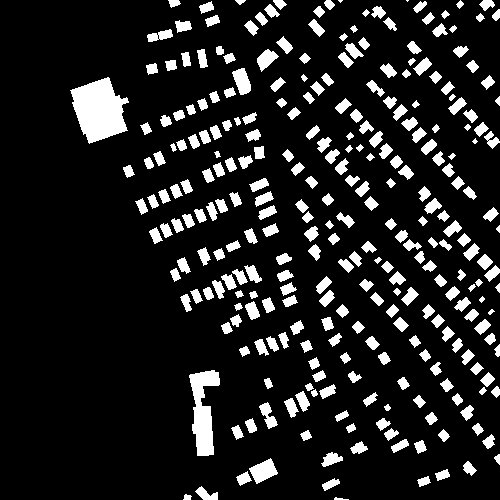

In [15]:
#Das zweite Bild
image = Image.fromarray(array_2.astype('uint8'))
image.save('image2.bmp')
display(image)

In [16]:
#Bild 'a.bmp'
image = Image.fromarray(array_1.astype('uint8'))
image.save('image1.bmp')
display(image)